# simple linear regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset.txt", delimiter=",")


In [8]:
X = data[:,0] 
# selects all the values in the first column (index 0) of data.
# These values represent the sizes of the houses.
# X is now a 1-dimensional NumPy array containing the sizes.

Y = data[:, 1].reshape(X.size, 1)
# data[:, 1].reshape(X.size, 1):

#     data[:, 1] selects all the values in the second column (index 1) of data.
#     These values represent the prices of the houses.
#     Y is reshaped to have the same number of rows as X and 1 column, making it a 2-dimensional array.
#     .reshape(X.size, 1) changes Y from a 1-dimensional array to a 2-dimensional array with one column. This is important for matrix operations in linear regression.



X = np.vstack((np.ones((X.size, )), X)).T



In [9]:
print(X.shape)
print(Y.shape)

(45, 2)
(45, 1)


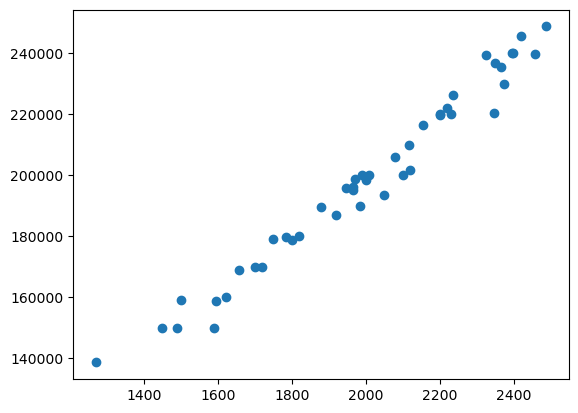

In [10]:
plt.scatter(X[:,1],Y)
plt.show()

In [26]:
def model(X,Y, learning_rate, iteration):
    m = Y.shape
    theta = np.zeros((2,1))
    
    for i in range(iteration):
        y_pred = np.dot(X,theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))


        d_theta = (1/m)*np.dot(X.T,y_pred -Y)
        theta = theta - learning_rate*d_theta

        cost_list.append(cost)

    return theta,cost_list
        

In [28]:
iteration = 100
learning_rate = 0.00000005
theta, cost_list = model(X, Y, learning_rate, iteration)

TypeError: unsupported operand type(s) for /: 'int' and 'tuple'

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the text file
data = np.loadtxt("dataset.txt", delimiter=",")

# Extract the sizes (X) and prices (Y)
X = data[:, 0]
Y = data[:, 1].reshape(X.size, 1)

# Add a column of ones to X for the bias term and transpose
X = np.vstack((np.ones((X.size, )), X)).T

def model(X, Y, learning_rate, iteration):
    # Initialize theta (parameters) to zeros
    theta = np.zeros((X.shape[1], 1))
    
    # List to store the cost at each iteration
    cost_list = []
    
    m = len(Y)
    
    for i in range(iteration):
        # Calculate the predictions
        predictions = X.dot(theta)
        
        # Calculate the error
        error = predictions - Y
        
        # Calculate the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        
        # Append the cost to the list
        cost_list.append(cost)
        
        # Calculate the gradient
        gradient = (1 / m) * X.T.dot(error)
        
        # Update the parameters
        theta = theta - learning_rate * gradient
    
    return theta, cost_list

# Parameters for gradient descent
iteration = 100
learning_rate = 0.00000005

# Train the model
theta, cost_list = model(X, Y, learning_rate, iteration)



In [22]:
# price of 1567 sqare fit
np.dot([1,1567],theta)

array([155746.83577767])

In [24]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1,
2800], [1, 3400], [1, 5000]])
for house in new_houses :
    print("Our model predicts the price of house with",
house[1], "sq. ft. area as : $", round(np.dot(house, theta)[0],
2))


Our model predicts the price of house with 1547 sq. ft. area as : $ 153759.0
Our model predicts the price of house with 1896 sq. ft. area as : $ 188446.7
Our model predicts the price of house with 1934 sq. ft. area as : $ 192223.59
Our model predicts the price of house with 2800 sq. ft. area as : $ 278296.8
Our model predicts the price of house with 3400 sq. ft. area as : $ 337931.81
Our model predicts the price of house with 5000 sq. ft. area as : $ 496958.52


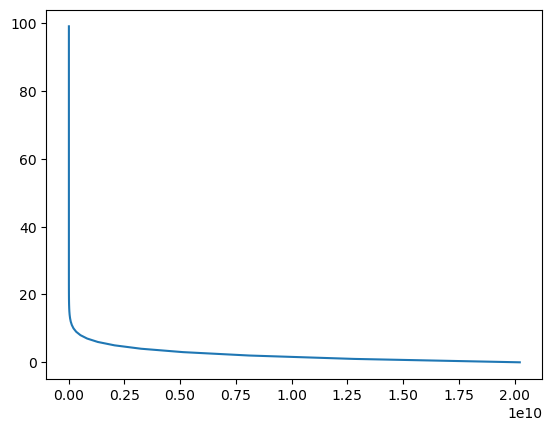

In [25]:
rng = np.arange(0, iteration)
plt.plot(cost_list, rng)
plt.show()

   Size   Price
0  1500  300000
1  1600  320000
2  1700  340000
3  1800  360000
4  1900  380000
Slope (m): 200.0
Intercept (b): 0.0


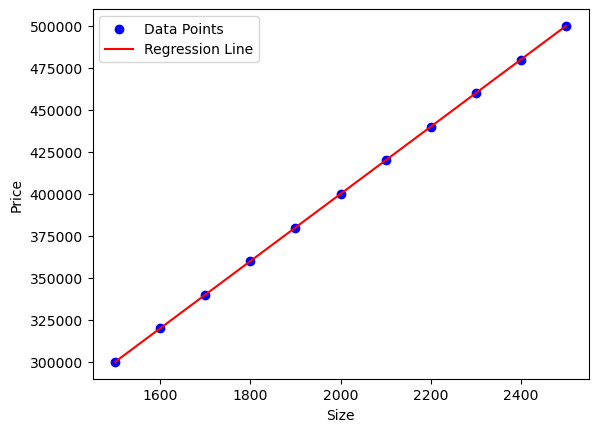

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
    
    def fit(self, X, y):
        n = len(X)
        numerator_m = (n * np.sum(X * y)) - (np.sum(X) * np.sum(y))
        denominator_m = (n * np.sum(X**2)) - (np.sum(X)**2)
        self.m = numerator_m / denominator_m
        
        self.b = (np.sum(y) - self.m * np.sum(X)) / n
    
    def predict(self, X):
        return self.m * X + self.b
    
    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, self.predict(X), color='red', label='Regression Line')
        plt.xlabel('Size')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Load data from Excel file
file_path = 'house_prices.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Extract features and target variable
X = data['Size'].values
y = data['Price'].values

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (m): {model.m}")
print(f"Intercept (b): {model.b}")

# Plot the results
model.plot(X, y)
